# Multi-Layered Perceptron

`sklearn` enthält auch eine Impementierung des Perzeptrons. Wir verwenden sie, um handgeschriebene Ziffern zu erkennen, und benutzen dazu den Digits-Datensatz aus `sklearn`.

## Laden des Digits-Daten

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y, images = digits.data, digits.target, digits.images

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def gallery(images, rows, cols, cmap=None):
    for n in range(rows * cols):          
        plt.subplot(rows, cols,n+1)
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)          
        plt.imshow(images[n], cmap) 

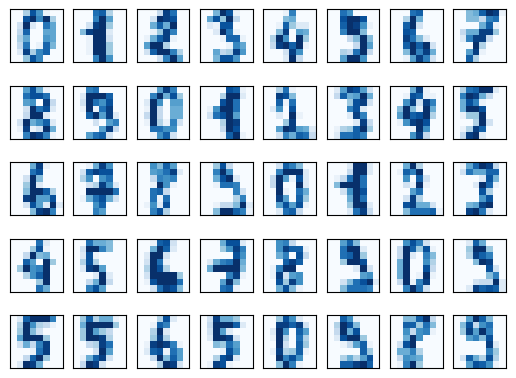

In [3]:
gallery(images,5,8,cmap='Blues') 
plt.show()

### Aufteilung der Daten

Wir teilen die Daten wieder in Trainings- und Testdaten auf.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

## Erzeugung und Training des Klassifizieres


**MLPClassifier** steht für *Multi-Layer Perceptron Classifier*. Dieser implementiert ein mehrschichtiges Perzeptron (ein künstliches neuronales Netzwerk) das durch den Backpropagation-Algorithmus trainiert wird.

Ein mehrschichtiges Perzeptron (MLP) ist ein Klassifikationsalgorithmus, der in der Lage ist, nicht-lineare Modelle zu lernen. Es besteht aus mindestens drei Schichten von Knoten: einer Eingabeschicht, einer oder mehreren "verborgenen" Schichten und einer Ausgabeschicht. Jede Schicht besteht aus Neuronen, wobei die Neuronen in einer Schicht mit denen in der nächsten Schicht verbunden sind.

### Die Parameter des MLPClassifier
Die MLPClassifier-Klasse in sklearn hat viele Parameter. Einige der wichtigsten:

- `hidden_layer_sizes`: Eine Liste, die die Anzahl der Neuronen in den verborgenen Schichten angibt.
- `activation`: Die Aktivierungsfunktion für die Neuronen. Dies kann 'logistic' (Sigmoid), 'tanh', 'relu' oder 'identity' sein.
- `solver`: Der Optimierer, der verwendet wird, um die Gewichte anzupassen. Dies kann 'lbfgs', 'sgd' (stochastischer Gradientenabstieg) oder 'adam' sein.
- `alpha`: Ein Regularisierungsparameter, der Overfitting verhindert.
- `learning_rate_init`: Die anfängliche Lernrate für die Gewichtsanpassungen.

Es ist eine der Aufgaben beim Deep Learning, die besten Parameter durch Experimentieren (und Erfahrung?) zu bestimmen.

In [5]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(64,30))

mlpc.fit(X_train, y_train)

,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


## Wie gut arbeitet der Klassifizierer?

Das überprüfen wir mit den Testdaten:

In [6]:
print(f'Anzahl der Digits:\t {len(X_test)}')
korrekt =  (mlpc.predict(X_test) == y_test).sum()
print(f'Korrekt erkannt:\t {korrekt } = {korrekt / len(X_test):.1%}')

Anzahl der Digits:	 540
Korrekt erkannt:	 530 = 98.1%


Mit der eingebauten Funktion:

In [7]:
score = mlpc.score(X_test, y_test)
print(f'Genauigkeit: {score:.1%}')

Genauigkeit: 98.1%


## Wie sehen falsch erkannte Ziffern aus?

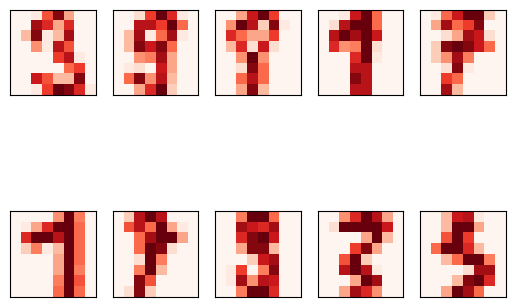

In [8]:
images_fehler= images[mlpc.predict(X) != y]
gallery(images_fehler,2,5,cmap='Reds')  
plt.show()